## Speech recognition

__You should be able to do this exercise after Lecture 9.__

In this exercise, we will work with the <a href="https://arxiv.org/pdf/1804.03209.pdf">Google Speech Command Dataset</a>, which can be downloaded from <a href="http://download.tensorflow.org/data/speech_commands_v0.02.tar.gz">here</a> (note: you do not need to download the full dataset, but it will allow you to play around with the raw audiofiles). This dataset contains 105,829 one-second long audio files with utterances of 35 common words.

We will use a subset of this dataset as indicated in the table below.

| Word | How many? | Class # |
| :-: | :-: | :-: |
| Yes | 4,044 | 3 |
| No | 3,941 | 1 |
| Stop | 3,872 | 2 |
| Go | 3,880 | 0 |

The data is given in the files `XSound.npy` and `YSound.npy`, both of which can be imported using `numpy.load`. `XSound.npy` contains spectrograms (_e.g._, matrices with a time-axis and a frequency-axis of size 62 (time) x 65 (frequency)). `YSound.npy` contains the class number, as indicated in the table above.

In [1]:
import numpy as np
import pandas as pd

In [2]:
#load data from numpy files
x_sound = np.load('XSound.npy')
print(x_sound.shape)
x_sound[0][0]

(15737, 62, 65, 1)


array([[2.0159737e-04],
       [1.0180937e-03],
       [5.7136011e-04],
       [4.2128502e-03],
       [1.0548917e-03],
       [1.2512492e-03],
       [1.9501926e-03],
       [9.1700244e-04],
       [1.4765629e-03],
       [1.2069751e-03],
       [1.3819467e-03],
       [4.9254560e-04],
       [8.7873719e-04],
       [1.2255987e-03],
       [1.2428621e-03],
       [2.5772114e-04],
       [6.4863521e-04],
       [6.0483423e-04],
       [2.3871455e-03],
       [1.8765696e-03],
       [6.3336449e-04],
       [4.0487433e-04],
       [7.9720403e-04],
       [1.0196997e-03],
       [2.8872845e-04],
       [1.6142083e-04],
       [1.3963705e-03],
       [7.4948266e-04],
       [4.1039204e-04],
       [1.0726824e-03],
       [3.8590512e-04],
       [1.1402575e-03],
       [6.1514223e-04],
       [5.5934064e-04],
       [6.8869442e-04],
       [1.1254685e-03],
       [5.7532365e-04],
       [5.4894306e-04],
       [5.6852243e-04],
       [1.6298289e-04],
       [4.7798437e-04],
       [3.080945

In [3]:
x_sound_class = np.load('YSound.npy')
x_sound_class.shape

(15737,)

sound spectrogram for sample- 0 class: 0


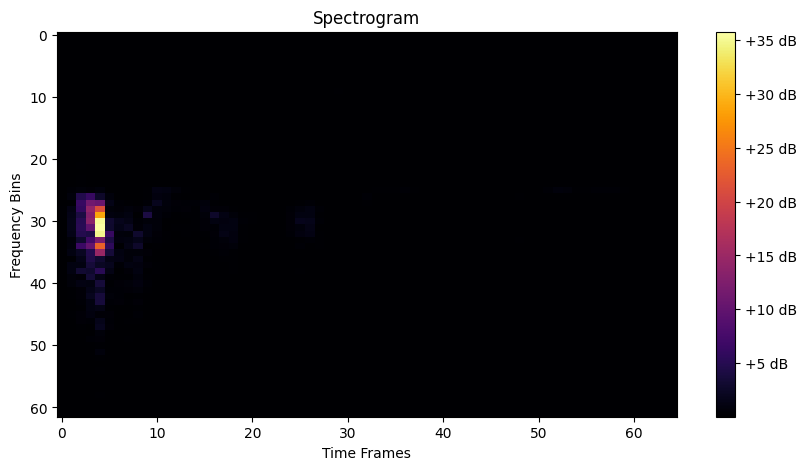

sound spectrogram for sample- 1 class: 1


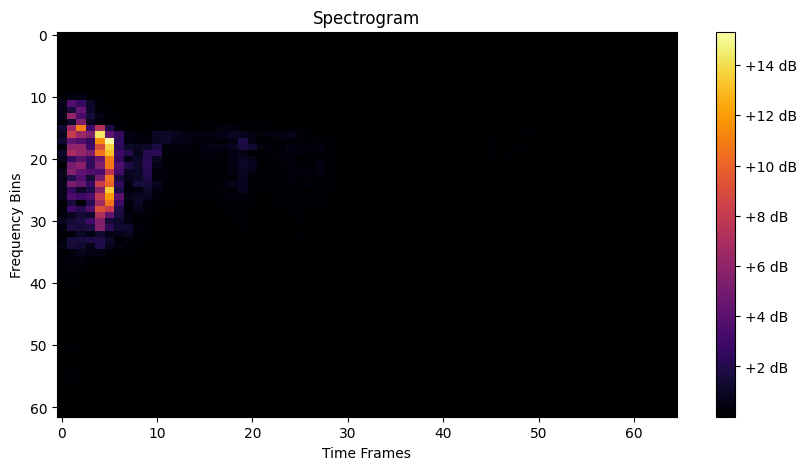

sound spectrogram for sample- 2 class: 3


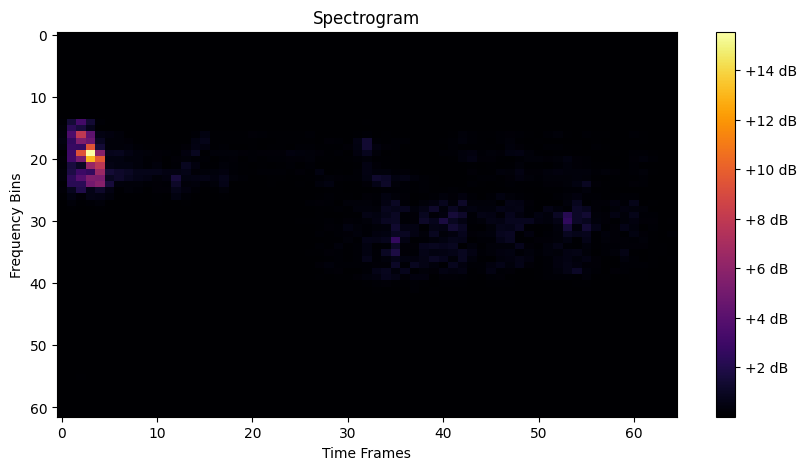

In [4]:
import matplotlib.pyplot as plt

#print sound spectrograms for the first 3 samples
for i in range(3):
    print("sound spectrogram for sample-",i, "class:", x_sound_class[i])
    plt.figure(figsize=(10, 5))
    plt.imshow(x_sound[i], aspect='auto', cmap='inferno')
    plt.title('Spectrogram')
    plt.xlabel('Time Frames')
    plt.ylabel('Frequency Bins')
    plt.colorbar(format='%+2.0f dB')
    plt.show()

__(a)__ Train a convolutional neural network on the data. Find a good set of hyperparameters for the model. Do you think a convolutional neural network is suitable for this kind of problem? Why/why not?

In [5]:
#split data into train, validation and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sound, x_sound_class, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=52)

In [6]:
x_train.shape, x_val.shape, x_test.shape

((9441, 62, 65, 1), (3148, 62, 65, 1), (3148, 62, 65, 1))

In [7]:
y_train.shape, y_val.shape, y_test.shape

((9441,), (3148,), (3148,))

In [8]:
#train a convolutional neural network on the data
from tensorflow import keras

#build model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(x_train.shape[1], x_train.shape[2], 1)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(4, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 63, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 30, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 9216)              0

Epoch 1/20
74/74 [==============================] - 25s 324ms/step - loss: 0.7406 - accuracy: 0.7219 - val_loss: 0.4520 - val_accuracy: 0.8281
Epoch 2/20
74/74 [==============================] - 40s 545ms/step - loss: 0.3881 - accuracy: 0.8638 - val_loss: 0.3322 - val_accuracy: 0.8926
Epoch 3/20
74/74 [==============================] - 23s 308ms/step - loss: 0.2641 - accuracy: 0.9073 - val_loss: 0.2487 - val_accuracy: 0.9145
Epoch 4/20
74/74 [==============================] - 21s 280ms/step - loss: 0.1870 - accuracy: 0.9349 - val_loss: 0.2382 - val_accuracy: 0.9241
Epoch 5/20
74/74 [==============================] - 30s 404ms/step - loss: 0.1451 - accuracy: 0.9488 - val_loss: 0.1910 - val_accuracy: 0.9336
Epoch 6/20
74/74 [==============================] - 41s 554ms/step - loss: 0.1177 - accuracy: 0.9574 - val_loss: 0.1765 - val_accuracy: 0.9400
Epoch 7/20
74/74 [==============================] - 21s 289ms/step - loss: 0.0888 - accuracy: 0.9692 - val_loss: 0.1562 - val_accuracy: 0.9482

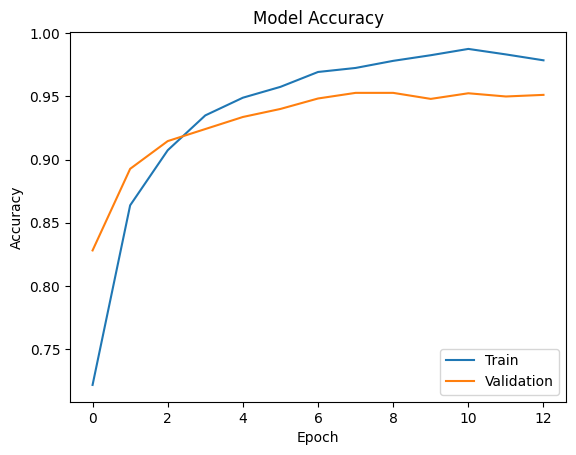

In [9]:
#compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#define early stopping callback
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
#train model
history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val), callbacks=[early_stopping])

#plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

__(b)__ Classify instances of the test set using your models. Draw a confusion matrix and comment on the results.

99/99 [==============================] - 6s 63ms/step


<Axes: >

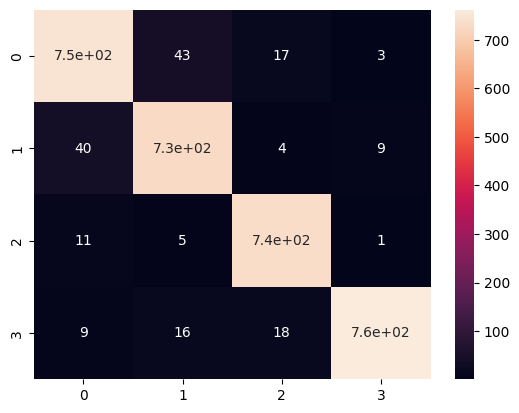

In [10]:
#classify test data
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

#evaluate model performance
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

import seaborn as sns
sns.heatmap(cm, annot=True)

sound spectrogram for sample- 9 true class: 2 predicted class: 1


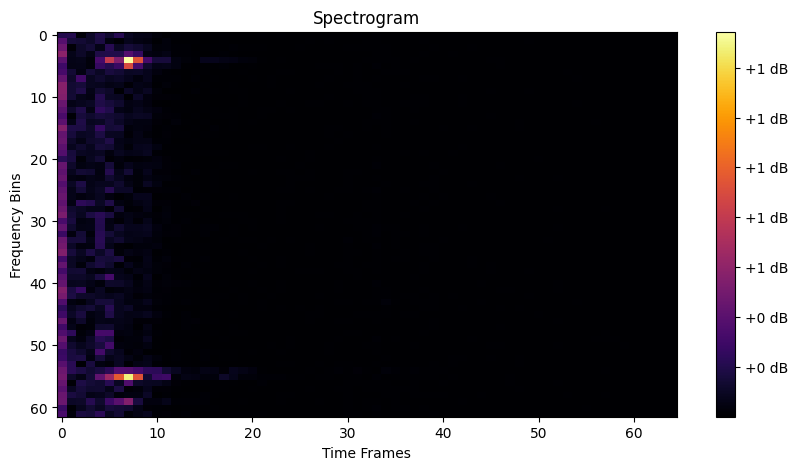

In [11]:
#plot sound spectrogram for one of the misclassified samples
for i in range(len(y_test)):
    if y_test[i] != y_pred[i]:
        print("sound spectrogram for sample-",i, "true class:", y_test[i], "predicted class:", y_pred[i])
        plt.figure(figsize=(10, 5))
        plt.imshow(x_test[i], aspect='auto', cmap='inferno')
        plt.title('Spectrogram')
        plt.xlabel('Time Frames')
        plt.ylabel('Frequency Bins')
        plt.colorbar(format='%+2.0f dB')
        plt.show()
        break

In [12]:
#print prediction accuracy for each class
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       810
           1       0.92      0.93      0.93       781
           2       0.95      0.98      0.96       752
           3       0.98      0.95      0.96       805

    accuracy                           0.94      3148
   macro avg       0.94      0.94      0.94      3148
weighted avg       0.94      0.94      0.94      3148

0.9440914866581956


__(c)__ Choose one other algorithm from the course, and redo (a) and (b) using this algorithm. Supply a brief discussion of why we would expect this algorithm to do better/worse than the CNN.

In [13]:
#train a long short-term memory (LSTM) recurrent neural network on the data, to classify the sound samples
from tensorflow import keras

#build model
model = keras.Sequential([
    keras.layers.LSTM(64, input_shape=(x_train.shape[1], x_train.shape[2])),
    keras.layers.Dense(4, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                33280     
                                                                 
 dense_2 (Dense)             (None, 4)                 260       
                                                                 
Total params: 33540 (131.02 KB)
Trainable params: 33540 (131.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/20
74/74 [==============================] - 15s 160ms/step - loss: 0.9564 - accuracy: 0.5658 - val_loss: 0.6724 - val_accuracy: 0.6896
Epoch 2/20
74/74 [==============================] - 6s 80ms/step - loss: 0.5881 - accuracy: 0.7122 - val_loss: 0.5504 - val_accuracy: 0.7189
Epoch 3/20
74/74 [==============================] - 6s 83ms/step - loss: 0.5119 - accuracy: 0.7476 - val_loss: 0.4932 - val_accuracy: 0.7773
Epoch 4/20
74/74 [==============================] - 5s 72ms/step - loss: 0.4420 - accuracy: 0.8205 - val_loss: 0.4237 - val_accuracy: 0.8358
Epoch 5/20
74/74 [==============================] - 6s 85ms/step - loss: 0.3844 - accuracy: 0.8490 - val_loss: 0.3837 - val_accuracy: 0.8625
Epoch 6/20
74/74 [==============================] - 6s 75ms/step - loss: 0.3347 - accuracy: 0.8751 - val_loss: 0.3411 - val_accuracy: 0.8726
Epoch 7/20
74/74 [==============================] - 5s 74ms/step - loss: 0.2896 - accuracy: 0.8927 - val_loss: 0.3256 - val_accuracy: 0.8745
Epoch 8/20


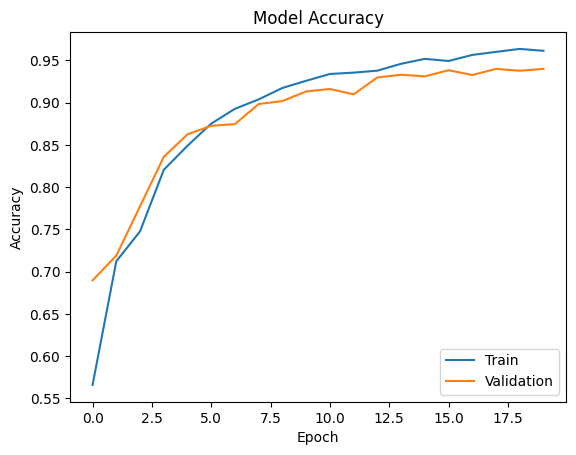

In [14]:
#compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#define early stopping callback
early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, min_delta=0.01, restore_best_weights=True)
#train model
history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val), callbacks=[early_stopping])

#plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

99/99 [==============================] - 2s 16ms/step


<Axes: >

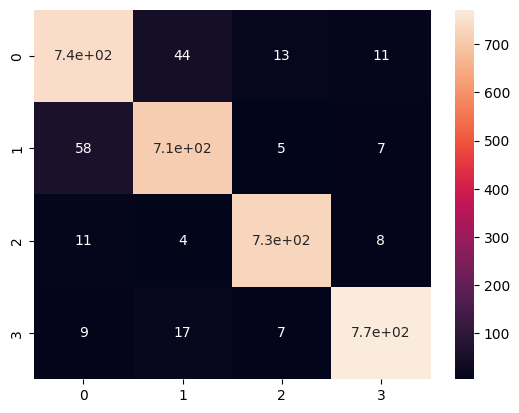

In [15]:
#classify test data
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

#evaluate model performance
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

import seaborn as sns
sns.heatmap(cm, annot=True)

In [16]:
#print accuracy for each class and overall accuracy
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       810
           1       0.92      0.91      0.91       781
           2       0.97      0.97      0.97       752
           3       0.97      0.96      0.96       805

    accuracy                           0.94      3148
   macro avg       0.94      0.94      0.94      3148
weighted avg       0.94      0.94      0.94      3148

0.9383735705209657
